In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
# define column names
names = ['ECG-HR-Mean', 'ECG-HR-StDev','ECG-QR-Ratio','feature4', 'feature5', 'feature6','feature7', 'feature8', 'feature9','feature10','labels']

In [3]:
# loading training data
df = pd.read_csv('csv/0324ECGoutput.csv', header = None, names = names)
#df = pd.read_csv('csv/xuezhiwangemotion.csv', header = None, names = names)
#df = pd.read_csv('csv/kuicaoemotion.csv', header = None, names = names)
df = shuffle(df, random_state = 0)
df.head(10)

,ECG-HR-Mean,ECG-HR-StDev,ECG-QR-Ratio,feature4,feature5,feature6,feature7,feature8,feature9,feature10,labels
84,0.12260,2.29630,98.109,8.92859,3.47761,2.795940,1.365550,1.163860,1.611660,0.447917,Tender
10,0.86919,0.96869,70.351,28.40830,8.78009,1.408780,1.248360,0.873006,1.513730,0.408414,Sad
75,0.17044,1.79440,89.142,27.81510,10.36540,4.878270,5.620670,3.846180,7.485700,3.093460,Tender
2,2.63540,1.05250,71.802,2.97172,1.89377,0.944230,0.713472,0.492374,0.824353,0.318157,Sad
24,6.08590,1.29720,62.210,8.26452,3.24355,2.313660,0.919109,1.040480,0.918515,0.356666,Tender
100,3.63800,3.12410,78.797,2.74422,1.47494,0.911508,0.699563,0.804233,0.665340,0.290664,Happy
107,0.28678,1.41100,92.596,112.72900,43.79460,14.047200,10.595500,6.912940,13.791300,6.783460,Happy
7,0.31070,1.12090,70.569,14.49530,11.73370,5.943020,3.507330,3.883450,3.845700,1.666530,Sad
16,0.65040,0.91686,69.235,5.18442,1.72886,0.829476,1.197630,0.863964,1.462140,0.340186,Sad
86,18.43200,1.82940,101.300,1.33048,1.20079,0.858980,1.204400,0.723439,1.528410,0.322868,Tender


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


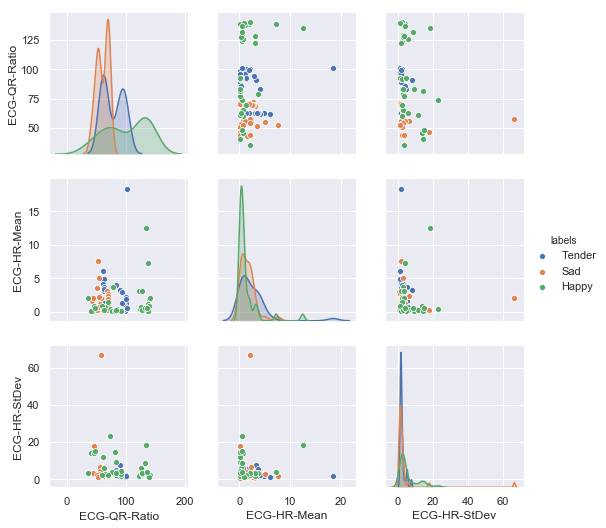

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
#sns.pairplot(df[['feature1', 'feature2', 'feature3', 'feature6','feature7', 'feature8', 'feature9','feature10','labels']],hue="labels", diag_kind="kde")
sns.pairplot(df[['ECG-QR-Ratio', 'ECG-HR-Mean', 'ECG-HR-StDev','labels']],hue="labels", diag_kind="kde")

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = True, title = 'Confusion Matrix of Predicted Emotion',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("normalized")
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),horizontalalignment = 'center',
                 color = "white" if cm[i,j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.tight_layout()

In [6]:
# creat design matrix X and target vector y
X_1 = np.array(df.iloc[:,[0,1,2]])
y_1 = np.array(df['labels'])

#split into train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

In [7]:
# second training set and testing set
X_2 = np.array(df.iloc[:,[5,6,7,8,9]])
y_2 = np.array(df['labels'])

#split into train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

In [8]:
# 3th training set and testing set
X_3 = np.array(df.iloc[:,[0,1,2,5,6,7,8,9]])
y_3 = np.array(df['labels'])

#split into train and test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.3, random_state = 42)

normalized
[[1.         0.         0.        ]
 [0.13461611 0.86538389 0.        ]
 [0.13896598 0.         0.86103402]]
normalized
[[1.         0.         0.        ]
 [0.10093389 0.89906611 0.        ]
 [0.11896906 0.         0.88103094]]
normalized
[[0.9436904  0.0230285  0.0332811 ]
 [0.12735353 0.87264647 0.        ]
 [0.12894944 0.19562997 0.6754206 ]]
normalized
[[1.         0.         0.        ]
 [0.13461611 0.86538389 0.        ]
 [0.11004638 0.         0.88995362]]


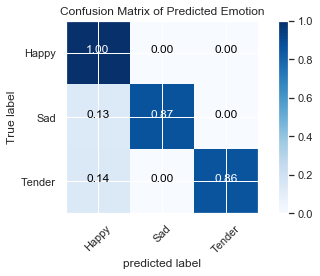

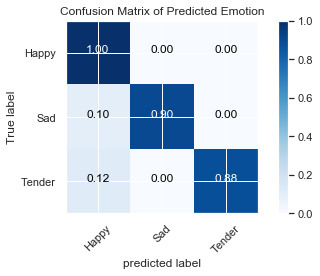

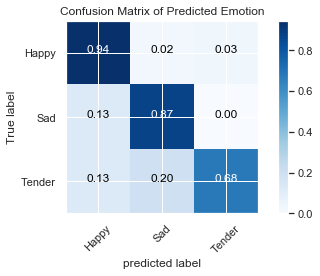

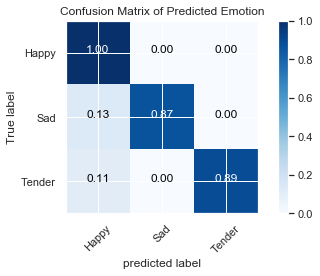

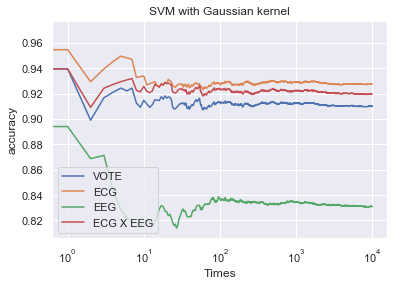

In [9]:
# SVM of Gaussian Kernel
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import random

c = 10
# train these three models
clf_1 = SVC(gamma = 'auto', kernel = 'rbf', C = c).fit(X_train_1, y_train_1)
clf_2 = SVC(gamma = 'auto', kernel = 'rbf', C = c).fit(X_train_2, y_train_2)
clf_3 = SVC(gamma = 'auto', kernel = 'rbf', C = c).fit(X_train_3, y_train_3)

acc_test_1 = 0
acc_test_2 = 0
acc_test_3 = 0
acc_test_4 = 0

acc1 = []
acc2 = []
acc3 = []
acc4 = []

cnf_matrix_1 = np.zeros((3,3))
cnf_matrix_2 = np.zeros((3,3))
cnf_matrix_3 = np.zeros((3,3))
cnf_matrix_4 = np.zeros((3,3))

for j in range(10000):

    random_num = random.randint(1, 50)
    X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_3, y_3, test_size = 0.3, random_state = random_num)



    pred_result_1 = clf_1.predict(X_test_4[...,0:3])
    pred_result_2 = clf_2.predict(X_test_4[...,3:8])
    pred_result_3 = clf_3.predict(X_test_4)

    result = []
    # predict
    for i in range(X_test_3.shape[0]):
        pred_1 = clf_1.predict(X_test_4[i][0:3].reshape(1,-1))
        pred_2 = clf_2.predict(X_test_4[i][3:8].reshape(1,-1))
        pred_3 = clf_3.predict(X_test_4[i].reshape(1,-1))
        pred = {'Happy':0,'Sad':0,'Tender':0};
        pred[pred_1[0]] += 1
        pred[pred_2[0]] += 1
        pred[pred_3[0]] += 1
        max_count = 0
        pred_result = ''
        for key,value in pred.items():
            if value > max_count:
                max_count = value
                pred_result = key
        if max_count == 1:
            result.append(pred_1[0])
        else:
            result.append(pred_result)
    result = np.array(result)

    acc_test_1 += accuracy_score(y_test_4, result)
    acc_test_2 += accuracy_score(y_test_4, pred_result_1)
    acc_test_3 += accuracy_score(y_test_4, pred_result_2)
    acc_test_4 += accuracy_score(y_test_4, pred_result_3)
    
    #acc1.append(accuracy_score(y_test_4, result))
    #acc2.append(accuracy_score(y_test_4, pred_result_1))
    #acc3.append(accuracy_score(y_test_4, pred_result_2))
    #acc4.append(accuracy_score(y_test_4, pred_result_3))
    
    acc1.append(acc_test_1/(j+1))
    acc2.append(acc_test_2/(j+1))
    acc3.append(acc_test_3/(j+1))
    acc4.append(acc_test_4/(j+1))
    
    
    
    cnf_matrix_1 += confusion_matrix(y_test_4, result)
    cnf_matrix_2 += confusion_matrix(y_test_4, pred_result_1)
    cnf_matrix_3 += confusion_matrix(y_test_4, pred_result_2)
    cnf_matrix_4 += confusion_matrix(y_test_4, pred_result_3)
    #np.set_printoptions(precision=8)
    #plt.figure()
    #labels = np.unique(df['labels'])
    #plot_confusion_matrix(cnf_matrix, classes = labels)
    
plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix_1, classes = labels)

plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix_2, classes = labels)

plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix_3, classes = labels)

plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix_4, classes = labels)

plt.figure()
plt.semilogx(acc1, label = 'VOTE')
plt.semilogx(acc2, label = 'ECG')
plt.semilogx(acc3, label = 'EEG')
plt.semilogx(acc4, label = 'ECG X EEG')
plt.legend()
plt.title("SVM with Gaussian kernel")
plt.xlabel('Times')
plt.ylabel('accuracy')
plt.show()

In [10]:
print(acc_test_1/10000)
print(acc_test_2/10000)
print(acc_test_3/10000)
print(acc_test_4/10000)


0.9100000000000317
0.927566666666675
0.8308515151516196
0.9196939393939608


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_4, result)

array([[ 9,  0,  0],
       [ 1, 10,  0],
       [ 2,  0, 11]])

In [12]:
cnf_matrix = confusion_matrix(y_test_4, result)
np.set_printoptions(precision=8)

normalized
[[1.         0.         0.        ]
 [0.09090909 0.90909091 0.        ]
 [0.15384615 0.         0.84615385]]


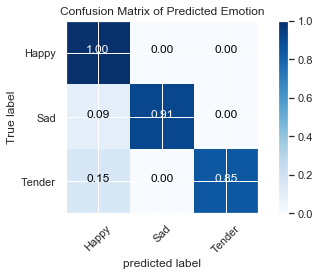

In [13]:
plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix, classes = labels)

normalized
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.15384615 0.         0.84615385]]


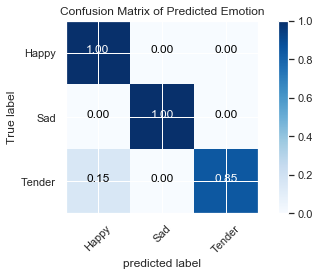

In [14]:
cnf_matrix1 = confusion_matrix(y_test_4, pred_result_1)
np.set_printoptions(precision=8)
plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix1, classes = labels)

normalized
[[1.         0.         0.        ]
 [0.27272727 0.72727273 0.        ]
 [0.15384615 0.15384615 0.69230769]]


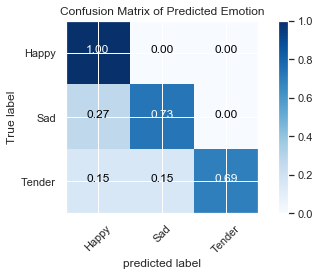

In [15]:
cnf_matrix2 = confusion_matrix(y_test_4, pred_result_2)
np.set_printoptions(precision=8)
plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix2, classes = labels)

normalized
[[1.         0.         0.        ]
 [0.09090909 0.90909091 0.        ]
 [0.07692308 0.         0.92307692]]


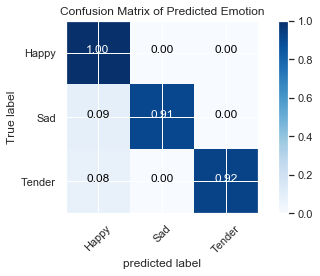

In [16]:
cnf_matrix3 = confusion_matrix(y_test_4, pred_result_3)
np.set_printoptions(precision=8)
plt.figure()
labels = np.unique(df['labels'])
plot_confusion_matrix(cnf_matrix3, classes = labels)